In [3]:
import matplotlib.pyplot as plt

import sys, os
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [4]:
# Read data from file 'Hitters.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later)
data = pd.read_csv("Hitters.csv")

In [5]:
# Preview the first 5 lines of the loaded data 
print(data.head())

          Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0     -Andy Allanson    293    66      1    30   29     14      1     293   
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   

   CHits    ...      CRuns  CRBI  CWalks  League Division PutOuts  Assists  \
0     66    ...         30    29      14       A        E     446       33   
1    835    ...        321   414     375       N        W     632       43   
2    457    ...        224   266     263       A        W     880       82   
3   1575    ...        828   838     354       N        E     200       11   
4    101    ...         48    46      33       N        E     805       40   

   Errors  Salary  NewLeague  
0      20     NaN          A  
1     

In [6]:
# Extract only numeric columns
numeric_col_idx = []
for idx, t in enumerate(data.dtypes):
    if str(t) in ["int64", "float64"]:
        numeric_col_idx.append(idx)
    numeric_data = data.iloc[:,numeric_col_idx]

In [7]:
# Remove NaN data
numeric_data = numeric_data.dropna()

In [8]:
# Preview the first 5 lines
print(numeric_data.head())

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks  PutOuts  Assists  Errors  Salary  
1   414     375      632       43      10   475.0  
2   266     263      880       82      14   480.0  
3   838     354      200       11       3   500.0  
4    46      33      805       40       4    91.5  
5   336     194      282      421      25   750.0  


In [9]:
# Prepare data
X = numeric_data.iloc[:,:-1]
Y = numeric_data.iloc[:,-1]

In [10]:
# Show data size
print("Record number: " + str(len(Y)))

Record number: 263


In [11]:
# LASSO test with different alphas
lasso = linear_model.Lasso(max_iter = 10000, normalize=True)

In [12]:
# Try several alphas
coefs = []
alphas = np.logspace(-3, 3, 200)

is_print = False
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, Y)
    coefs.append(lasso.coef_)

    # Check the last three features left
    if len([ c for c in lasso.coef_ if c != 0 ]) == 3 and not is_print:
        last_three_feature = []
        for idx, c in enumerate([ c for c in lasso.coef_ if c != 0 ]):
            last_three_feature.append(list(X)[idx])
        print("The last three features are " + ", ".join(last_three_feature))	# AtBat, Hits, HmRun
        is_print = True

The last three features are AtBat, Hits, HmRun


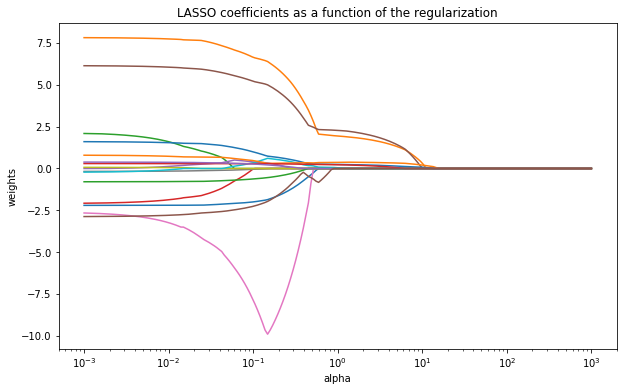

In [13]:
# Plot alpha-coefficient relation
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.title('LASSO coefficients as a function of the regularization')

In [18]:
# Find the optimal alpha by cross-validation
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X, Y)
opitmal_alpha = lassocv.alpha_
print(lassocv.alpha_)

0.0635481759986


In [16]:
# Build model using the optimal alpha
lasso.set_params(alpha=opitmal_alpha)
lasso.fit(X, Y)

# Check coefficients
print(lasso.coef_)
# Number of features left
print("Feature number left in the model: " + str(len([ x for x in lasso.coef_ if x != 0 ])))

[-2.08295369  7.04101066  0.         -0.68261512  0.49655158  5.51178063
 -6.10762506 -0.08706575  0.          0.15646752  1.22806115  0.58382084
 -0.69060051  0.29269419  0.30437223 -2.4507947 ]
Feature number left in the model: 14


In [17]:
# Check MSE
y_pred = lasso.predict(X)
mse = mean_squared_error(Y, y_pred)
print("MSE: {0}".format(mse))

MSE: 96243.08961334323
